<a href="https://colab.research.google.com/github/Parthiv95/Parthiv/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
 return np.mean(np.abs((y_true-y_pred/y_true))*100)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime

In [ ]:
data=pd.read_excel(r"/content/drive/MyDrive/Stock_D1.xlsx")
data.head(7)

,TICKER,FIGI,DATE,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
0,GEF,BBG000BLFQH8,2019-01-04,EOD,daily,46.31,47.6198,46.2300,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
1,GEF,BBG000BLFQH8,2019-01-03,EOD,daily,46.43,46.5200,46.1400,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2,GEF,BBG000BLFQH8,2019-01-02,EOD,daily,45.38,46.5400,45.1600,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
3,GF,BBG000C3C6S2,2018-06-05,Intraday,daily,18.86,18.9100,18.8700,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
4,GF,BBG000C3C6S2,2018-06-04,EOD,daily,18.86,18.8900,18.7900,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
5,GF,BBG000C3C6S2,2018-06-01,EOD,daily,18.58,18.7600,18.5800,18.74,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0
6,GF,BBG000C3C6S2,2018-05-31,EOD,daily,18.52,18.5200,18.3012,18.49,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0


In [ ]:
df=pd.DataFrame(data)
fcol=df.pop('DATE')
df.insert(0,'DATE',fcol)
df.tail(5)

,DATE,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
994,2020-06-27,GF,BBG000C3C6S2,EOD,daily,18.63,18.6300,18.51,18.61,28400.0,11.717560,11.717560,11.642085,11.704981,28400.0,NaN,0.0,1.0
995,2020-06-26,GF,BBG000C3C6S2,EOD,daily,18.52,18.5901,18.42,18.53,60000.0,11.648374,11.692464,11.585478,11.654664,60000.0,NaN,0.0,1.0
996,2020-06-25,GF,BBG000C3C6S2,EOD,daily,18.66,18.7200,18.59,18.60,171700.0,11.736429,11.774167,11.692402,11.698691,171700.0,NaN,0.0,1.0
997,2020-06-24,GF,BBG000C3C6S2,EOD,daily,18.91,18.9500,18.83,18.83,35200.0,11.893669,11.918828,11.843352,11.843352,35200.0,NaN,0.0,1.0
998,2020-06-23,GF,BBG000C3C6S2,EOD,daily,19.05,19.0500,18.95,18.95,34300.0,11.981724,11.981724,11.918828,11.918828,34300.0,NaN,0.0,1.0


In [ ]:
df=df[df.TICKER!='GEF']
df=df[df.TYPE!='Intraday']
dcols=['FIGI','TYPE','FREQUENCY','VOLUME','ADJ_OPEN','ADJ_HIGH','ADJ_LOW','ADJ_CLOSE','ADJ_LOW','ADJ_CLOSE','ADJ_VOLUME','ADJ_FACTOR','EX_DIVIDEND','SPLIT_RATIO']
df.drop(dcols,axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,DATE,TICKER,OPEN,HIGH,LOW,CLOSE
4,2018-06-04,GF,18.86,18.890,18.7900,18.8100
5,2018-06-01,GF,18.58,18.760,18.5800,18.7400
6,2018-05-31,GF,18.52,18.520,18.3012,18.4900
7,2018-05-30,GF,18.47,18.678,18.4700,18.6500
8,2018-05-29,GF,18.51,18.510,18.1500,18.2562


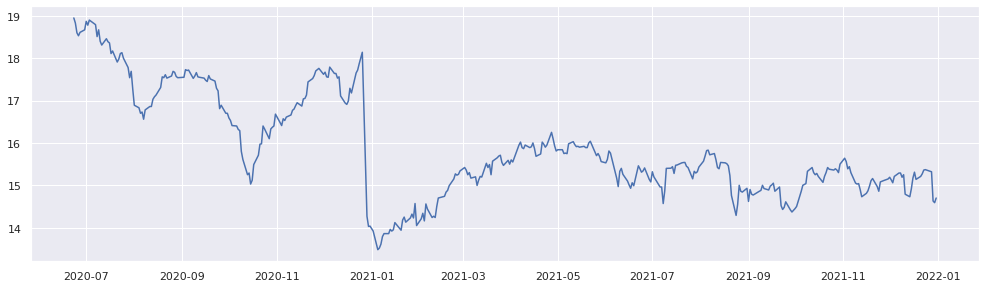

In [ ]:
import datetime
sdate=pd.to_datetime('2019-01-04')
edate=pd.to_datetime('2022-01-03')
df['DTAE']=pd.to_datetime(df['DATE'])
new_df=(df['DATE']>=sdate)&(df['DATE']<=edate)
df1=df.loc[new_df]
Sdata=df1.set_index('DATE')
plt.figure(figsize=(17,8))
tplt=plt.subplot2grid((5,4),(0,0), rowspan=3,colspan=4)
tplt.plot(Sdata.index,Sdata["CLOSE"])

In [ ]:
def plot_moving_average(series,window=5,plot_intervals=False,scale=1.96):
  rolling_mean=series.rolling(window=window).mean()
  plt.figure(figsize=(17,8))
  plt.title('Moving avegae\n window size={}'.format(window))
  plt.plot(rolling_mean,'g',label='Rolling Mean Trend')
  if plot_intervals:
    mae= mean_absolute_error(series[window:],rolling_mean[window:])
    deviation=np.std(series[window:]-rolling_mean[window:])
    lbound=rolling_mean-(mae+scale*deviation)
    ubound=rolling_mean+(mae+scale*deviation)
    plt.plot(ubound,'r--',label='Upper Bound/Lower Bound')
    plt.plot(lbound,'r--')
    plt.plot(series[window:],label='Actual Values')
    plt.legend(loc='best')
    plt.grid(True)

NameError: ignored

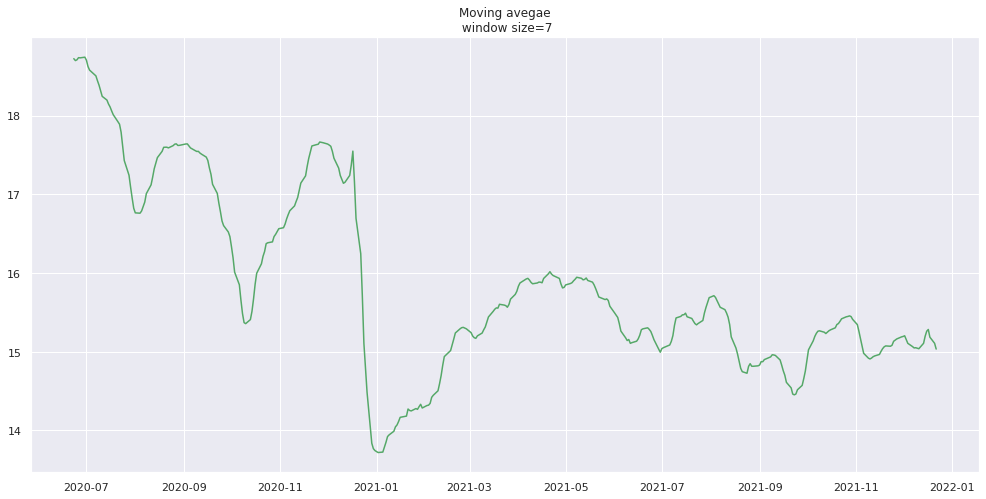

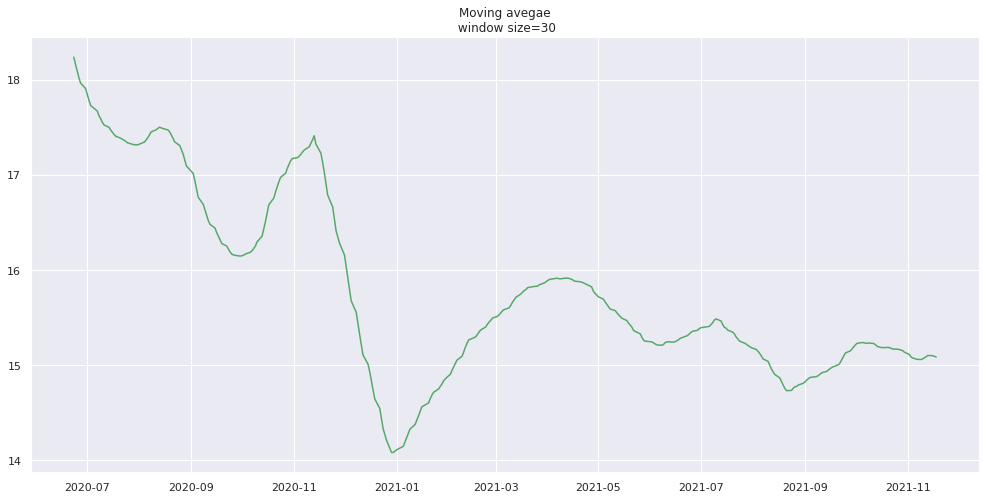

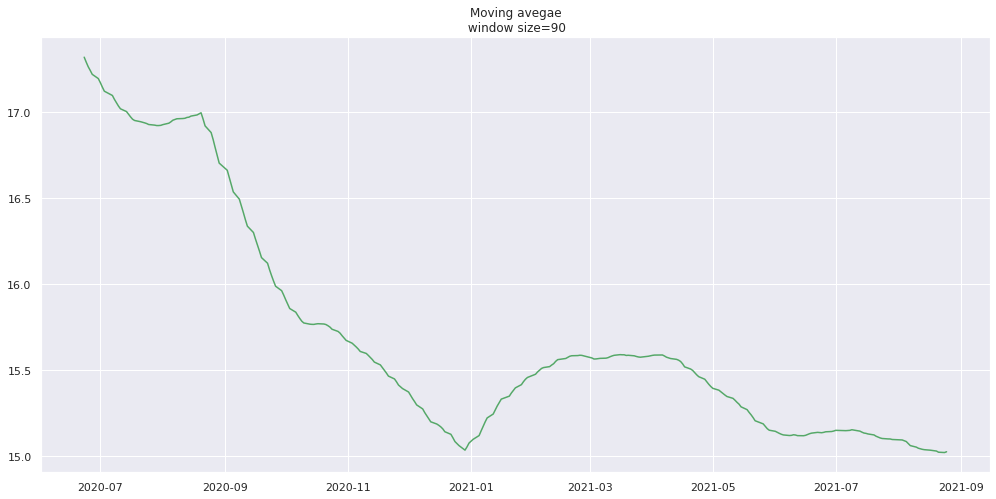

In [ ]:
plot_moving_average(Sdata.CLOSE,7)
plot_moving_average(Sdata.CLOSE,30)
plot_moving_average(Sdata.CLOSE,90, plot_intervals=True)

In [ ]:
def exponential_smoothing(series,alpha):
  """given a series and alpha, return series of exponentially smoothed points"""
  results=np.zeros_like(series)
  results[0]=series[0]
  for t in range(1,series.shape[0]):
    results[t]=alpha*series[t]+(1-alpha)*results[t-1]
    return results

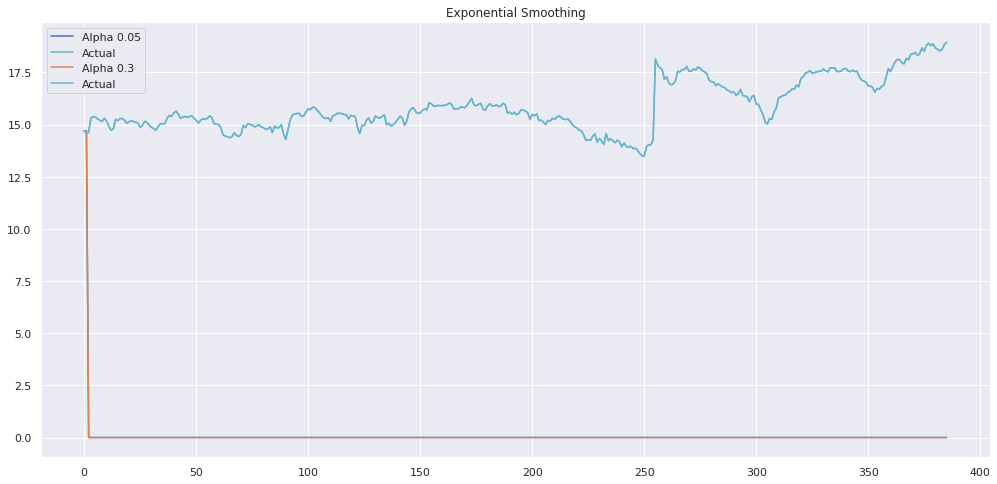

In [ ]:
def plot_exponential_smoothing(series, alphas):
  plt.figure(figsize=(17,8))
  for alpha in alphas:
    plt.plot(exponential_smoothing(series.values,alpha),label="Alpha {}".format(alpha))
    plt.plot(series.values,"c",label="Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)
plot_exponential_smoothing(Sdata.CLOSE,[0.05,0.3])

In [ ]:
def double_exponential_smoothing(series,alpha,beta):
  result=[series[0]]
  for n in range(1,len(series)+1):
    if n ==1:
      level,trend=series[0],series[1]-series[0]
      if n>=len(series):
        value=result[-1]
      else:
        value=series[n]
        last_level,level=level,alpha*value+(1-alpha)*(level+trend)
        trend = beta*(level-last_level)+(1-beta)*trend
        result.append(level+trend)
        return result

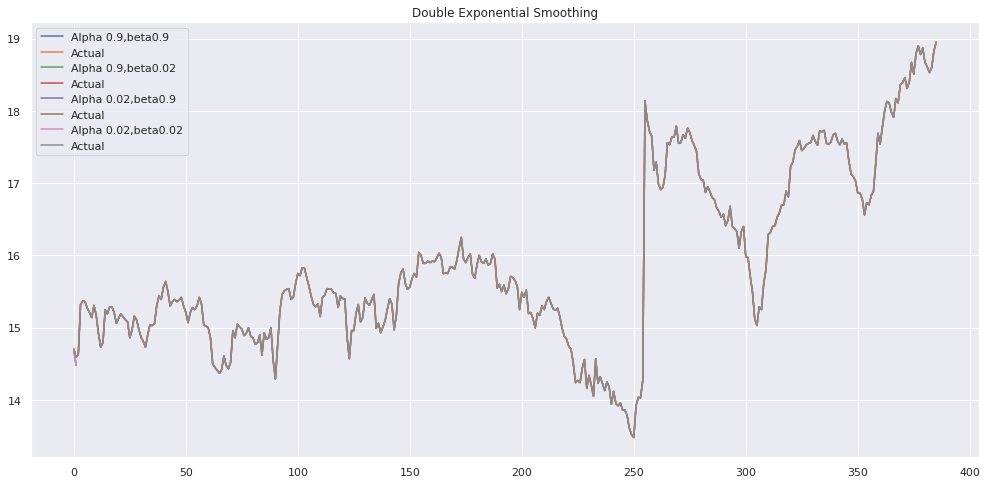

In [ ]:
def plot_double_exponential_smoothing(series,alphas,betas):
  plt.figure(figsize=(17,8))
  for alpha in alphas:
    for beta in betas:
      plt.plot(double_exponential_smoothing(series,alpha,beta),label="Alpha {},beta{}".format(alpha,beta))
      plt.plot(series.values,label="Actual")
  plt.legend(loc="best")
  plt.axis('tight')
  plt.title("Double Exponential Smoothing")
  plt.grid(True)
plot_double_exponential_smoothing(Sdata.CLOSE,alphas=[0.9,0.02],betas=[0.9,0.02])

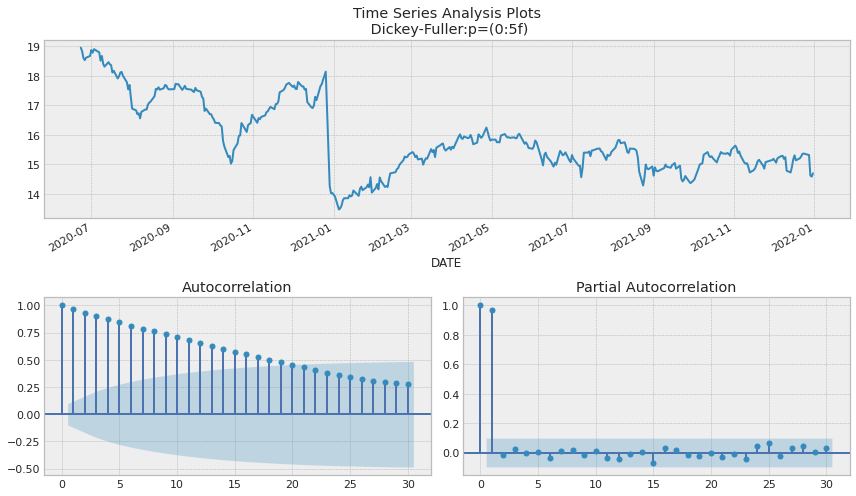

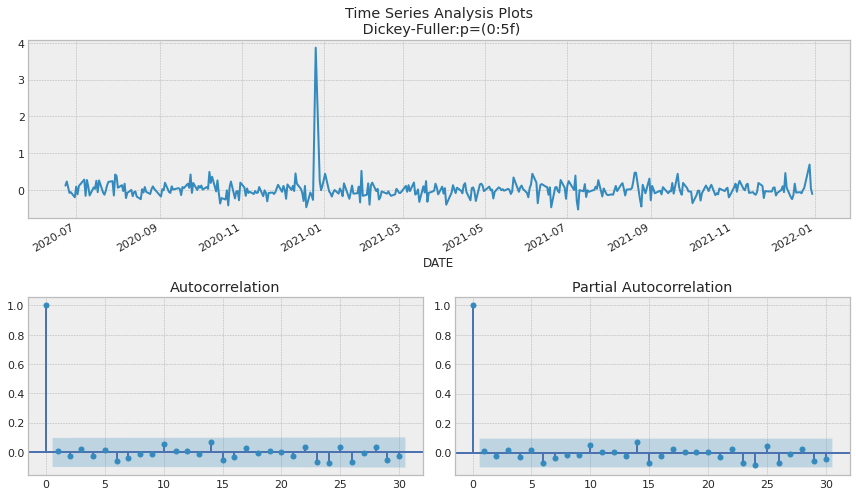

In [ ]:
#Modelling-AugmentedDickeyFuller Test
def tsplot(y, lags=None, figsize=(12,7), style='bmh'):
  if not isinstance(y, pd.Series):
    y=pd.Series(y)
  with plt.style.context(style='bmh'):
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout,(0,0), colspan=2)
    acf_ax=plt.subplot2grid(layout,(1,0))
    pacf_ax=plt.subplot2grid(layout,(1,1))
    y.plot(ax=ts_ax)
    p_value=sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller:p=(0:5f)'.format(p_value))
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    plt.tight_layout()
tsplot(Sdata.CLOSE,lags=30)
data_diff=Sdata.CLOSE-Sdata.CLOSE.shift(1)
tsplot(data_diff[1:],lags=30)


In [ ]:
# Conclusion
#Very High Correlation
# A p-value below a threshold(such as 5% or !%) suggests we reject the null hypothesis(stationary), otherwise a p value above threshold suggests we fail to reject the null hypothoesis (Stationary).p-Value>0.05: Fail to reject the Null Hypothesis(H0), the data has a unit root and  is non stationary


In [ ]:
 # SARIMA(Seasonal Autoregressive Integrated Moving Average Model)

In [ ]:
# Set initial Values and some bounds
ps=range(0,5)
d=1
qs= range(0,5)
Ps= range(0,5)
D= 1
Qs = range(0,5)
s=5
# creating a list with all possible combinations of parameters
parameters= product(ps,qs,Ps,Qs)
parameters_list= list(parameters)
len(parameters_list)

625

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s):
  results = []
  best_aic = float('inf')
  for param in tqdm_notebook(parameters_list):
    try: model = sm.tsa.statespace.SARIMAX(data.CLOSE, order=(param[0], d, param[1]),seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    except:
      continue
    aic = model.aic
        #Save best model, AIC and parameters
    if aic < best_aic:
      best_model = model
      best_aic = aic
      best_param = param
    results.append([param, model.aic])
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    return result_table
result_table = optimize_SARIMA(parameters_list, d, D, s)
#Set parameters that give the lowest AIC (Akaike Information Criteria)


  0%|          | 0/625 [00:00<?, ?it/s]

In [ ]:
p, q, P, Q = result_table.parameters[0]
best_model = sm.tsa.statespace.SARIMAX(df.CLOSE, order=(p, d, q),seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             CLOSE   No. Observations:                  994
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 5)   Log Likelihood                -191.255
Date:                           Wed, 29 Mar 2023   AIC                            384.511
Time:                                   04:35:02   BIC                            389.406
Sample:                                        0   HQIC                           386.372
                                           - 994                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0862      0.001    121.974      0.000       0.085       0.088
Ljung-Box (L1) (Q):                   1.82 